(This cell defines macros for $\LaTeX$, invisible when rendered)
<!-- Define some LaTeX macros for the MarkDown cells -->
$\newcommand{\BM}[1]{\boldsymbol{\mathsf{{#1}}}}$
$\newcommand{\bv}[1]{{\mathbf{\boldsymbol{{#1}}}}}$
$\newcommand{\Ex}{\mathrm{E}}$
$\newcommand{\Var}{\mathrm{Var}}$
$\newcommand{\Cov}{\mathrm{Cov}}$
$\newcommand{\bra}[1]{\langle#1|}$
$\newcommand{\ket}[1]{|#1\rangle}$
$\newcommand{\braket}[2]{\langle#1|#2\rangle}$
<!-- Uncomment to test: $\BM{\Sigma}$ <br> $\bv{x}$ <br> $\Ex[x]$ <br> $\Var(x)$ <br>$\Cov(x,y)$ <br> $\bra{\bv{x}}$ <br> $\ket{\bv{y}}$ <br> $\braket{\bv{x}}{\bv{y}}$ -->

<!-- In order to export to PDF, copy this part into a "Raw NBConvert" cell instead:
\newcommand{\BM}[1]{\boldsymbol{\mathsf{{#1}}}}
\newcommand{\bv}[1]{{\mathbf{\boldsymbol{{#1}}}}}
\newcommand{\Ex}{\mathrm{E}}
\newcommand{\Var}{\mathrm{Var}}
\newcommand{\Cov}{\mathrm{Cov}}
\newcommand{\bra}[1]{\langle#1|}
\newcommand{\ket}[1]{|#1\rangle}
\newcommand{\braket}[2]{\langle#1|#2\rangle}
-->

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# An introduction to the derivation and uses of ocean tangent-linear and adjoint models (TAMs): an idealised model of North Atlantic subpolar gyre circulation

<hr style="height:2pt">

## A short primer on notation
As these methods rely heavily on linear algebra and vector calculus, this notebook uses the bra-ket notation of Dirac (1939): this notation allows the reader to quickly identify whether otherwise complicated strings of terms ultimately turn out to be scalars, column vectors, row vectors, or matrices.

The notation writes column vectors $\bv{a}$ as "kets": $|\bv{a}\rangle$, and row vectors $\bv{b^{T}}$ as "bras": $\langle\bv{b}|$. The inner (dot) product between a column vector $|\bv{a}\rangle$ and a row vector $\langle\bv{b}|$ (which is always scalar) is written as $\langle{\bv{b}}|\bv{a}\rangle$. We can see instantly that this expression is a scalar, because it is "closed" by bra-ket angle brackets on both sides.

A matrix $\BM{X}$ multiplied by the column vector (which produces another column vector) can thus be written as $\BM{X}|\bv{a}\rangle$. We can see instantly that this multiplication produces another column vector because it is "open" on the left. Similarly $\langle\bv{b}|\BM{X}$ is "open" on the right, so corresponds to another row vector. 

Lastly, the outer product between a row vector and a column vector $\bv{a}\bv{b^{T}}$, which always produces a matrix, e.g. $\BM{C}$, is written $|\bv{a}\rangle\langle\bv{b}|$. Again, the expression being "open" on both sides indicates that it is a matrix. Further clarification comes from notational convention: scalars are regular italic $(c)$, vectors use bold italic $(|\bv{a}\rangle,\langle\bv{b}|)$, and matrices are in roman bold $(\BM{C})$. The matrix transpose (where rows and columns are swapped) is indicated with a dagger: $(\BM{C}^{\dagger})$

#### Summary:

| Angle brackets     | Example                                                               | Outcome        |
| -----------        | :-------------------------------------------------------------------: | -------------- |
|<span style="color:white"> -|<span style="color:white"> ------------------ | <span style="color:white">-|
| Closed             | $\sqrt{\langle{\bv{b}}\vert\BM{X}\BM{Y}^{\dagger}\vert\bv{a}\rangle}$ | scalar         |
| Open on left       | $d\BM{X}^{\dagger}\BM{C}\BM{X}|\bv{a}\rangle$                          | column vector  |
| Open on right      | $\langle\bv{b}|\BM{X}\BM{C}\BM{X}^{\dagger}$                           | row vector     |
| Open on both sides | $\BM{S}^{-1}|\bv{a}\rangle\langle\bv{b}| d$                           | matrix         |
    
<hr style="height:2pt">
   
<br><br><br>    
    
# The model

<img height="750" width="375" src="img/BornStocker14.png">

### Basic properties and physics
The model is the idealised "cylinder" model of the North Atlantic subpolar gyre as presented in Born and Stocker (2014). Similarly to regular "box" models, there is an upper layer (①,② in the above schematic) and a lower layer (③,④), but uniquely, there is an "inner" (①,③) and an "outer" (②,④) layer in each. These respectively represent the gyre interior (where surface heat loss in winter can lead to unstable vertical density gradients, triggering convection - "C" in the above schematic) and the gyre boundary (where horizontal density gradients with the interior lead to flow around it - "U$_{1,2}$" in the above schematic). The model uses mixed surface boundary conditions: temperature anomalies in the upper layer decay towards a seasonal cycle  ($\mathrm{T^{atm}}$ in the above schematic), fluxing excess heat out or taking up heat when deficient at a rate dictated by a constant parameter. There is no "weather" or any other sort of variability, just a repeating seasonal cycle. Salinity (which cannot exchange with the atmosphere) is subject to a constant freshwater flux term, encapsulating ice melt, river runoff and precipitation (F in the above schematic).

### Exchange between the four regions
While the upper and deep interior layers can exchange thermohaline properties via convection as described above, the interior and boundary can also exchange heat and salinity, through a representation of eddy fluxes across the "front" that arises at the interface between them (E in the above schematic). The rate of this heat (or salt) exchange is enhanced by an increased temperature (or salinity) gradient between interior and boundary, or a stronger boundary current.
    
<br><br>    

### More on the circulation    
The boundary current, as briefly described above, is determined from density differences between the boundary and the interior. Specifically, the thermal wind relation is used, integrated from the bottom up. The lower layer velocity is thus dependent on density differences in the lower layer alone, while the upper layer velocity depends on both upper and lower layer densities. Because of this, changes in density at depth can change the circulation (and exchange rate, hence density properties) in the upper layer. However, changes in the upper layer density do not directly impact the lower layer circulation: they can only reach the deep if convection is triggered. This has important consequences for the TAM of the model, to which we will return later.

We note an important part of the interior⁠—boundary density gradient mechanism: only the interior density can vary as the model evolves - boundary densities are fixed to prescribed, constant values. These values represent typical properties of water masses in the subpolar gyre boundary current (Irminger Current water for the upper layer, Icelandic Slope water for the lower layer).
    
Finally, we have thus far only considered the depth-varying (baroclinic) component of the boundary current velocities. An additional, constant (barotropic) component is prescribed, which additionally represents the wind-driven aspect of the circulation. 
    
BS14 find that, with the default model parameters (which we also use here), the depth-and-time-varying density-driven baroclinic component discussed above accounts for up to 25% of the total boundary volume transport. Additionally, the strength of the circulation controls the rate of convection and export from the deep gyre interior, hence the strength of overturning.

# Model equations
### A tiny bit more on notation and definitions...
As the boundary T and S are prescribed, and density and velocity are purely functions of T and S, it is only gyre interior (①,③) T and S which uniquely determine the state of the model under a given configuration at a given time. These variables ($T_{1},S_{1},T_{3},S_{3}$) are hence the "state variables" of the model. They can be written into a "state vector" 
<center> $|\bv{U}(t)\rangle = \begin{pmatrix}T_{1}(t) \\ S_{1}(t) \\ T_{3}(t) \\ S_{3}(t)\end{pmatrix}$. </center>

Their forward evolution is determined by a set of nonlinear differential equations:

<center> 
$d_{t}|\bv{U}(t)\rangle = \begin{pmatrix}\partial_{t}T_{1}(t) \\ \partial_{t}S_{1}(t) \\ \partial_{t}T_{3}(t) \\ \partial_{t}S_{3}(t)\end{pmatrix}=\mathcal{N}(|\bv{U}\rangle,t)=\begin{pmatrix}\mathcal{N}_{1}(T_{1},S_{1},T_{3},S_{3},t) \\ \mathcal{N}_{2}(T_{1},S_{1},T_{3},S_{3},t) \\ \mathcal{N}_{3}(T_{1},S_{1},T_{3},S_{3},t) \\ \mathcal{N}_{4}(T_{1},S_{1},T_{3},S_{3},t) \end{pmatrix}$
</center>

This more compact representation of the equations will be of enormous assistance later. The equations are as follows:

<br><br>

## Interior temperature/salinity [prognostic/state variables]
### Upper layer temperature
<font size=4><center> $\partial_{t}T_{1}=cU_{1}(T_{2}-T_{1})+\tau^{-1}[T_{0}^{atm}- T_{amp}^{atm}\cos(\omega t) - T_{1}]$</center></font>

where, in BS14:
- $T_{2}=10^{\circ}$C is the upper layer boundary temperature
- $\tau=30 $days is the (e-folding) decay time of surface temperature anomalies
- $T_{0}^{atm}=6^{\circ}$C is the time-mean surface atmospheric temperature (SAT)
- $T_{amp}^{atm}=8^{\circ}$C is the amplitude of the seasonal cycle of SAT 
- $\omega=\frac{2\pi}{365}$ radians/day is the frequency of the seasonal cycle. 

The first term on the right-hand side (RHS) is the eddy exchange rate between the gyre interior and exterior, and the second is the surface heat flux.

### Upper layer salinity
<font size=4><center> $\partial_{t}S_{1}=cU_{1}(S_{2}-S_{1}) - FWF\frac{S_{0}}{h}$</center></font>

where, in BS14:
- $S_{2}=35$ psu is the upper layer boundary salinity
- $FWF=1$ m yr$^{-1}$ is the constant surface freshwater flux (FWF) term,
- $S_{0}=35$ psu is a reference salinity for translating the FWF into a salinity change rate
- $h=100$ m is the depth of the upper layer (also used here to translate FWF into salinity change)

### Lower layer temperature and salinity
<font size=4><center> $\partial_{t}T_{3}=cU_{2}(T_{4}-T_{3})$</center></font>
<font size=4><center> $\partial_{t}S_{3}=cU_{2}(S_{4}-S_{3})$</center></font>
where, in BS14:
- $T_{4}=4^{\circ}$C is the lower layer boundary temperature
- $S_{4}=34.9$psu is the lower layer boundary salinity

<hr>

## Convection condition
Notice that the above equations do not contain any terms for convection. This is handled online within the model as a condition on density. The density anomaly from a constant reference density $\rho_0=1026$kgm$^{-3}$ is calculated using a linear equation of state:

<font size=4><center> $\sigma_{i}=-\alpha T_{i}+\beta S_{i} \qquad _{i=1,2,3,4}$</center></font>

Where, in BS14:
- $\alpha=0.11$kgm$^{-3}$K$^{-1}$ is the thermal expansion coefficient
- $\beta=0.77$kgm$^{-3}$psu$^{-1}$ is the haline contraction coefficient

Upper layer interior density exceeding lower layer interior density triggers an instantaneous mixing of the two-layers to their thickness-weighted average value:

<font size=4><center> $\sigma_{1} > \sigma_{3} \implies T_{1}=T_{3}=\frac{hT_{1}+dT_{3}}{h+d} , S_{1}=S_{3}=\frac{hS_{1}+dS_{3}}{h+d}$</center></font>

Where $h=100$ m is the thickness of the upper layer and $d=1400$ m is the thickness of the lower layer.

<hr>

## Boundary current velocities & eddy exchange
The lower layer boundary current velocity is the sum of a constant barotropic component and a baroclinic thermal wind component, as described previously. The upper layer velocity additionally includes an upper layer thermal wind component.

<font size=4><center> $U_{2}=U_{btp} - \frac{gd}{2fw\rho_{0}}(\sigma_{4}-\sigma_{3})$</center></font>
<font size=4><center> $U_{1}=U_{2} - \frac{gh}{2fw\rho_{0}}(\sigma_{2}-\sigma_{1})$</center></font>

where, in BS14:
- $U_{btp}=0.133$ms$^{-1}$ is the constant, prescribed barotropic velocity, encapsulating external wind
- $g=9.8$ms$^{-2}$ is acceleration due to gravity 
- $f=1.19\times10^{-4}$s$^{-1}$ is the local Coriolis frequency
- $w=100$km is the width of the boundary current

Finally, in addition to thermohaline gradients and current intensity, the eddy exchange across the interior-boundary interface is controlled by an "efficiency" parameter, $c$:

<font size=4><center> $c_{i}=c^{*}\frac{A_{i}}{V_{i}}$ </center></font>
where, in BS14:
- $c^{*}=0.03$ is a dimensionless mixing efficiency
-$A_{1}=2\pi rh$ is the surface area of the upper layer interface
-$A_{2}=2\pi rd$ is the surface area of the lower layer interface
-$V_{1}=\pi r^{2}h$ is the volume of the upper layer
-$V_{2}=\pi r^{2}d$ is the volume of the lower layer



<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


# Setting up the model
We set up the model exactly as in BS14, with the parameters set in the below cell

In [2]:
# Model time-stepping parameters
dt     =86400
nt     =365*15
t      =np.arange(0,nt*dt,dt)

# Boundary conditions
T2,S2  =10,35
T4,S4  = 4,34.9

# Physical time/frequency parameters
tau    =30*86400
f      =1.19e-4
omega  =(2*np.pi)/(86400*365.)
g      =9.80665

# Geometry and thermohaline coefficients
alpha  =0.11
beta   =0.77
rho0   =1026
h      =100
d      =1400
w      =100e3
r      =300e3
A1,A2  =(2*np.pi*r*h),(2*np.pi*r*d)
V1,V2  =(np.pi)*(r**2)*h,(np.pi)*(r**2)*d

# Boundary current parameters
u_btp  =0.1333
c_star =0.03

c1=c_star*(A1/V1)
c2=c_star*(A2/V2)

# Forcing parameters
TA0    =6
TAA    =8
FWF    =1/31536000.
S0     =35
F      = FWF*(S0/h)


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Solving the model equations
We solve the above equations numerically using a basic forward-in-time scheme for 15 years with a time step of 1 day:

<font size=4><center> $d_{t}|\bv{U}\rangle = \mathcal{N}(|U(t)\rangle,t)\implies\frac{|\bv{U}(t_{i})\rangle-|\bv{U}(t_{i-1})\rangle}{\Delta t} \approx \mathcal{N}(|\bv{U}(t_{i-1})\rangle,t_{i-1})$ </center></font>
    
<font size=3><center>$\qquad \qquad \qquad \qquad i=1..n, |\bv{U}(t_{0})\rangle=\begin{pmatrix} T_2 \\ S_2 \\ T_4 \\ S_4\end{pmatrix}$</font></center>
where

$\Delta t=86400$ seconds and $n=365\times15$ time steps. 

Note that the initial condition (interior=boundary) means that the model begins with no lateral density gradients or baroclinic velocities.

## Basic run
We begin by coding the model (in the below cell) and then (in the following cell) running the model with the default parameters and recreating Fig. 2 of BS14:

In [3]:
def BS14_NL(IC=[T2,S2,T4,S4],nt=15*365,dt=86400):
    '''
    ----------------------------------------------------------------------------
    Run the Born and Stocker (2014) model of the North Atlantic subpolar gyre in 
    regular (nonlinear) mode. All parameters default to BS14 values.
    
    Parameters:
    -----------
    IC (list or 1x4 ndarray): Initial condition state vector, consisting of 
                              initial values for (in order)
                              T1,S1,T3, and S3, the upper layer temperature & 
                              salinity and lower layer temperature &
                              salinity, respectively. Defaults to BS14 values.
    nt (int)                : The number of time steps to run for. 
    dt (float)              : The size of the time step (in seconds). 
    
    Returns:
    -----------
    T1,S1,T3,S3 (1xnt ndarrays): Time series of the four state variables
    U1,U2       (1xnt ndarrays): Time series of the diagnostic 
                                 (upper and lower layer) boundary velocity
    rho1,rho3   (1xnt ndarrays): Time series of the diagnostic interior density
    '''
    
    
    # Initialise prognostic variables and set initial values to ICs
    T1,S1,T3,S3=np.zeros(nt),np.zeros(nt),np.zeros(nt),np.zeros(nt)
    T1[0],S1[0],T3[0],S3[0]=IC[0],IC[1],IC[2],IC[3]
    
    # Initialise density variables and set initial values to ICs
    rho1,rho3=np.zeros(nt),np.zeros(nt)
    rho1[0]=-(alpha*T1[0])+(beta*S1[0])
    rho3[0]=-(alpha*T3[0])+(beta*S3[0])
    rho2   =-(alpha*T2   )+(beta*S2   )
    rho4   =-(alpha*T4   )+(beta*S4   )

    # Initialise velocity variables to barotropic velocity
    U1,U2=np.zeros(nt),np.zeros(nt)
    U2[0]=u_btp  - ( (g*d)/(2*f*w*rho0) )*(rho4-rho3[0])
    U1[0]=U2[0]  - ( (g*h)/(2*f*w*rho0) )*(rho2-rho1[0]) 
    
    # Main model time-stepping loop:
    for ti in np.arange(1,nt):       
        # Upper layer
        HF=(1./tau)*(TA0-( TAA*np.cos(omega*t[ti]) )-T1[ti-1])
    
        T1[ti]=T1[ti-1] + dt*( c1*U1[ti-1]*(T2-T1[ti-1])+HF  )
        S1[ti]=S1[ti-1] + dt*( c1*U1[ti-1]*(S2-S1[ti-1])-F )
    
        # Lower layer
        T3[ti]=T3[ti-1] + dt*( c2*U2[ti-1]*(T4-T3[ti-1]) )
        S3[ti]=S3[ti-1] + dt*( c2*U2[ti-1]*(S4-S3[ti-1]) )
    
        # Check for static instability / trigger convective mixing
        rho1[ti]=-(alpha*T1[ti])+(beta*S1[ti])
        rho3[ti]=-(alpha*T3[ti])+(beta*S3[ti])
    
        if ( rho1[ti] > rho3[ti] ):
            # Update tracers
            Tavg=( (h*T1[ti])+(d*T3[ti]) )/( h + d )
            Savg=( (h*S1[ti])+(d*S3[ti]) )/( h + d )
            T1[ti],T3[ti]=Tavg,Tavg
            S1[ti],S3[ti]=Savg,Savg
        
            # Update densities
            rho1[ti]=-(alpha*T1[ti])+(beta*S1[ti])
            rho3[ti]=-(alpha*T3[ti])+(beta*S3[ti])

       # Calculate/update baroclinic velocities
        U2[ti]=u_btp  - ( (g*d)/(2*f*w*rho0) )*(rho4-rho3[ti])
        U1[ti]=U2[ti] - ( (g*h)/(2*f*w*rho0) )*(rho2-rho1[ti])                
            
    return T1,S1,T3,S3,U1,U2,rho1,rho3

<hr style="height:2pt">

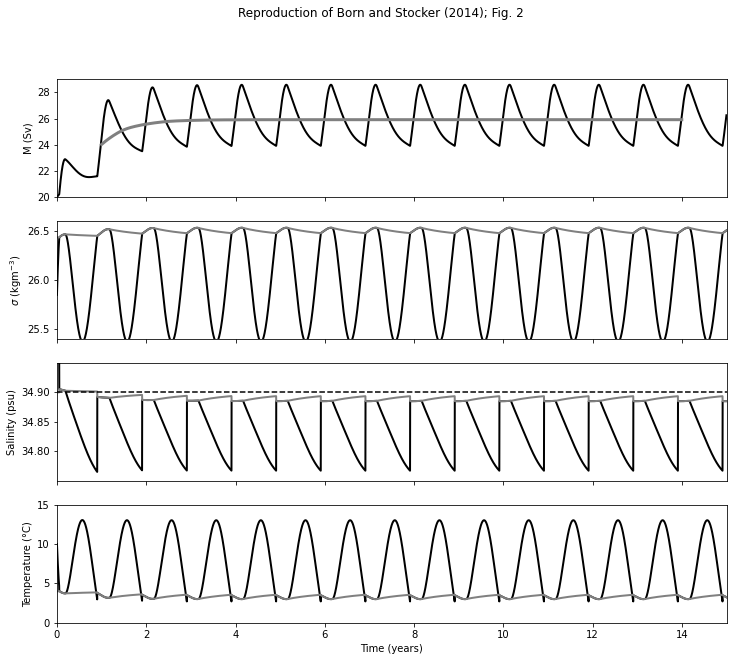

In [4]:
#-------------------------------------------------------------------------------
# Run the model:
T1,S1,T3,S3,U1,U2,rho1,rho3=BS14_NL()

# Plot the output
fig,ax=plt.subplots(4,1)
tyrs=t/31536000. #Time in years rather than seconds
AX=ax[0]
# Calculate the total volume transport (VT)
M=(U1*h + U2*d)*w*1e-6 
#Calculate the moving 1-yr average VT
Myrs=np.convolve(M,np.ones(int(31536000/dt))/(31536000/dt),mode='same'); 
#Remove invalid values less than 1 year from start/end
Myrs[0:int(31536000/dt)]=np.nan;Myrs[-int(31536000/dt):]=np.nan 
AX.plot(tyrs,M   ,color='k'   ,linewidth=2)
AX.plot(tyrs,Myrs,color='grey',linewidth=3)
AX.set_xlim(0,15);AX.set_xticklabels([])
AX.set_ylim(20,29)
AX.set_yticks(np.arange(20,30,2))
AX.set_ylabel('M (Sv)')

AX=ax[1]
AX.plot(tyrs,rho1,color='k',linewidth=2)
AX.plot(tyrs,rho3,color='grey',linewidth=2)
AX.set_ylabel(r'$\sigma$ (kgm$^{-3}$)')
AX.set_xlim(0,15);AX.set_xticklabels([])
AX.set_ylim(25.4,26.6);AX.set_yticks(np.arange(25.5,27,.5))

AX=ax[2]
AX.plot(tyrs,S1,color='k',linewidth=2)
AX.plot(tyrs,S3,color='grey',linewidth=2)
AX.set_xlim(0,15);AX.set_xticklabels([])
AX.set_ylim(34.75,34.95)
AX.set_yticks(np.arange(34.8,34.93,.05))
AX.axhline(34.9,linestyle='--',color='k')
fig.set_size_inches(12,10)
AX.set_ylabel('Salinity (psu)')

AX=ax[3]
AX.set_ylabel('Temperature (°C)')
AX.set_xlim(0,15)
AX.set_ylim(0,15)
AX.plot(tyrs,T1,color='k',linewidth=2)
AX.plot(tyrs,T3,color='grey',linewidth=2)
AX.set_xlabel('Time (years)')
fig.suptitle('Reproduction of Born and Stocker (2014); Fig. 2');

<hr style="height:2pt">

# Linearising the model
<hr>

## Why? A recap on nonlinear and linear systems

A fundamental question about physical systems such as the one described by the above model is how they respond to being perturbed, or, more particularly, how sensitive they are to small changes in inputs. Unfortunately, nonlinear models are often very complex, and "nonlinear" systems can take on so many different forms (infinity minus one, to look at it cynically) that there is no hope of a general approach which covers every possible one. The quip of Stanislaw Ulam, that the umbrella term "nonlinear science" is akin to describing zoology as "the study of non-elephant animals", seems relevant here. 

Despite this complication, we can make progress through linearisation. Much like a tangent line to a point on a curve gives a fair approximation to the curve near that point, the "tangent-linear" of a nonlinear system with a known solution (like the one plotted above) can give a good approximation to other solutions "near" that solution - that is, small perturbations to it. 

Linearisation allows access to the first-order response to a perturbation, and moreover allows us to work with tools from linear algebra to determine many useful properties of this first-order response. This comes at the cost of some simplifications. Whereas a nonlinear model may respond in any number of ways to being slightly disturbed, a perturbation to a linear system can only ever decay to 0 or grow to infinity, either uniformly or in oscillations of descreasing or increasing amplitude. In the latter case, nonlinear feedbacks to slow this growth, as would be found in reality, cannot be represented. Another gross simplification is that of scaling: doubling the magnitude of a perturbation in a linear system leads to double the response. Likewise for tripling, quadrupling, and so on, without bound - a linear balloon never bursts. 

The above limitations (when treated with care and caution) should not become an issue, and allow access to a powerful toolkit. The tool we are particularly interested in is the companion to the model's tangent-linear: its adjoint. We first begin with the more intuitive tangent-linear model, from which the adjoint may be directly found.


##  Deriving the tangent-linear model
We seek a linear system of differential equations associated with the full nonlinear system.
As above, we write the model state as a state vector, $|\bv{U}(t)\rangle$. We again write the nonlinear system
$
d_{t}|\bv{U}(t)\rangle = \mathcal{N}(|\bv{U}\rangle,t)
$

or, in full:

<center>$
\begin{pmatrix}
\partial_{t}T_{1}(t) \\
\partial_{t}S_{1}(t) \\
\partial_{t}T_{3}(t) \\
\partial_{t}S_{3}(t) \\
\end{pmatrix}
=
\begin{pmatrix}
\mathcal{N}_{1}(T_{1},S_{1},T_{3},S_{3},t) \\
\mathcal{N}_{2}(T_{1},S_{1},T_{3},S_{3},t) \\ 
\mathcal{N}_{3}(T_{1},S_{1},T_{3},S_{3},t) \\ 
\mathcal{N}_{4}(T_{1},S_{1},T_{3},S_{3},t) 
\end{pmatrix}
=
\begin{pmatrix}
cU_{1}(T_{2}-T_{1})+\tau^{-1}[T_{0}^{atm}- T_{amp}^{atm}\cos(\omega t) - T_{1}] \\
cU_{1}(S_{2}-S_{1}) - FWF\frac{S_{0}}{h} \\
cU_{2}(T_{4}-T_{3}) \\
cU_{2}(S_{4}-S_{3}) \\
\end{pmatrix}
$
</center>

If we separate the state vector into a time-evolving mean state $|\bv{\overline{u}(t)}\rangle$ (our known solution such as the one we plotted above, known as the "trajectory") and a perturbation to it $|\bv{u}\rangle$, i.e., $|\bv{U}\rangle = |\bv{\overline{u}}\rangle + |\bv{u}\rangle$, then the nonlinear system can be written as a Taylor expansion about the mean state:

<center><font size=4> $d_{t}(|\bv{\overline{u}}\rangle+|\bv{u}\rangle)=\mathcal{N}(|\bv{\overline{u}}\rangle,t)+\left.\frac{d\mathcal{N}}{d|\bv{u}\rangle}\right\vert_{\bv{|\overline{u}\rangle}}|\bv{u}\rangle+\mathcal{O}(|\bv{u}\rangle^{2})$</center><font>
    
This is simply a multidimensional generalisation of the Taylor series which describes the tangent line to a curve at a point in our 1D example:
<center><font size=4>$f(\bar{x}+x)=f(\bar{x})+f'(\bar{x})x+\mathcal{O}(x^{2})$</center></font>
    
In the multidimensional case, the derivative term on the right hand side is the derivative of a vector function with respect to a vector. This corresponds to a (4x4) _matrix_ populated by the derivative of each of the (4) original nonlinear equations ($\mathcal{N}_{i}$) with respect to the (4) variables of the state vector. This matrix is the _Jacobian_:
<center><font size=4>
$    
\frac{d\mathcal{N}}{d|\bv{u}\rangle}=
\begin{pmatrix}
\frac{\partial\mathcal{N}_{1}}{\partial T_{1}} & \dots  & \frac{\partial\mathcal{N}_{1}}{\partial S_{3}} \\ 
\vdots                                         & \ddots & \vdots \\
\frac{\partial\mathcal{N}_{4}}{\partial T_{1}} & \dots  & \frac{\partial\mathcal{N}_{4}}{\partial S_{3}} \\ 
\end{pmatrix}.
$
</center></font>

Before proceeding, some tidying up. The left hand terms on each side of the Taylor expansion are just the original nonlinear system describing the known mean state. As this trajectory solution is known and we are interested in the effects of perturbing it, these terms are somewhat redundant. If, additionally, the perturbation is small, the higher order terms can be neglected, leaving us with a linear system of differential equations for the perturbation:

<center><font size=4>$d_{t}|\bv{u}\rangle=\BM{A}(t)|\bv{u}\rangle , \qquad \BM{A}(t)=\left.\frac{d\mathcal{N}}{d|\bv{u}\rangle}\right\vert_{\bv{|\overline{u}\rangle}}$</center></font>
Where we have used the more compact matrix term $\BM{A}(t)$ to represent the Jacobian.

We can readily calculate the elements of $\BM{A}(t)$ using the product rule for derivatives, e.g., from the first equation
<center><font size=4> 
$\partial_{t}T_{1}=\mathcal{N}_{1}(|\bv{U}\rangle,t)=cU_{1}(T_{2}-T_{1})+\tau^{-1}[T_{0}^{atm}- T_{amp}^{atm}\cos(\omega t) - T_{1}]$</center></font>

we obtain
    
<center><font size=4>$\left.\frac{\partial\mathcal{N}_{1}}{\partial T_{1}}\right\vert_{|\bv{\overline{u}}\rangle}=c\left.\frac{\partial U_{1}}{\partial T_{1}}\right\vert_{|\overline{\bv{u}}\rangle}(\overline{T_{2}}-\overline{T_{1}})-c\overline{U_{1}}-\frac{1}{\tau}$
    </center></font>
Note that any partial derivatives of $U_{i}$ with respect to the state variables are constant (as the velocity is a constant [barotropic velocity] plus a linear function of T and S [baroclinic velocity]). Hence it is somewhat superfluous to note each time that these partial derivatives are to be evaluated at $|\overline{\bv{u}}\rangle$, as we have in the above example. For brevity we therefore drop this when writing the full matrix:

<hr>
<center><font size=2.5> $\BM{A}(t)= \\
\begin{pmatrix}
c\frac{\partial U_{1}}{\partial T_{1}}(\overline{T_{2}}-\overline{T_{1}})-c\overline{U_{1}}-\frac{1}{\tau}
& 
c\frac{\partial U_{1}}{\partial S_{1}}(\overline{T_{2}}-\overline{T_{1}})
& 
c\frac{\partial U_{1}}{\partial T_{3}}(\overline{T_{2}}-\overline{T_{1}})
&
c\frac{\partial U_{1}}{\partial S_{3}}(\overline{T_{2}}-\overline{T_{1}})
\\ 
c\frac{\partial U_{1}}{\partial T_{1}}(\overline{S_{2}}-\overline{S_{1}})
&
c\frac{\partial U_{1}}{\partial S_{1}}(\overline{S_{2}}-\overline{S_{1}})-c\overline{U_{1}}
&
c\frac{\partial U_{1}}{\partial T_{3}}(\overline{S_{2}}-\overline{S_{1}})
&
c\frac{\partial U_{1}}{\partial S_{3}}(\overline{S_{2}}-\overline{S_{1}})
\\
\color{red}{c\frac{\partial U_{2}}{\partial T_{1}}(\overline{T_{4}}-\overline{T_{2}})}
&
\color{red}{c\frac{\partial U_{2}}{\partial S_{1}}(\overline{T_{4}}-\overline{T_{2}})}
&
c\frac{\partial U_{2}}{\partial T_{3}}(\overline{T_{4}}-\overline{T_{2}})-c\overline{U_{2}}
&
c\frac{\partial U_{2}}{\partial S_{3}}(\overline{T_{4}}-\overline{T_{2}})
\\
\color{red}{c\frac{\partial U_{2}}{\partial T_{1}}(\overline{S_{4}}-\overline{S_{2}})}
&
\color{red}{c\frac{\partial U_{2}}{\partial S_{1}}(\overline{S_{4}}-\overline{S_{2}})}
&
c\frac{\partial U_{2}}{\partial T_{3}}(\overline{S_{4}}-\overline{S_{2}})
&
c\frac{\partial U_{2}}{\partial S_{3}}(\overline{S_{4}}-\overline{S_{2}})-c\overline{U_{2}}
\\
\end{pmatrix}$
</center>
</font>
<hr>

Here, the $(\bar{T},\bar{S})_{(1,3)}$ are the time-varying values of the unperturbed mean state, with $\bar{U}_{(1,2)}$ the corresponding trajectory velocities. Recall that the velocities in this model are _diagnostic_ variables, so not part of the mean state.

As explained above, the partial derivatives in $U_{1,2}$ are constant. In particular, the terms <span style="color:red">coloured in red </span> have 0 derivatives, as the baroclinic velocities are integrated from the bed up and so changes in upper layer buoyancy do not impact lower layer velocities. Recall that the only way that upper-layer buoyancy can affect the lower layer in the full, nonlinear model is through convection, which is a highly nonlinear process (a step function of instantaneous mixing triggered by a condition) and is absent in the linearised version. There is therefore no way for a small perturbation in the linear model's upper layer to have an effect on the lower layer, highlighting one of the caveats involved in the linear framework. 

## Solving the linear model equations
One advantage of linear systems of differential equations such as the one we obtained above is that a unique, well-defined solution always exists. This solution takes the form

<center><font size=4>$|\bv{u}(t_{1})\rangle = \BM{\Psi}(t_{1},t_{0})|\bv{u}(t_{0})\rangle.$</center></font>

The matrix $\BM{\Psi}(t_{1},t_{0})$ is called the _propagator_ matrix, which linearly maps the perturbation $|\bv{u}(t)\rangle$ from its state at time $t_{0}$ to its state at time $t_{1}$.

How do we find $\BM{\Psi}$? Not easily. The linear system of differential equations that we derived above is _non-autonomous_ (i.e. the coefficients of $\BM{A}$ vary with time, for instance due to the seasonal cycle) so, even though it is a relatively simple system, and it can be shown mathematically that a solution exists, actually obtaining this solution is not a trivial matter. We turn again to a numerical solution, again using a basic forward scheme:

<center><font size=4> $\partial_{t}|\bv{u}\rangle=\BM{A}(t)|\bv{u}\rangle \implies$</font></center>
    
<center><font size=4>$\frac{|\bv{u}(t_{i})\rangle-|\bv{u}({t_{i-1}})\rangle}{\Delta t} \approx \BM{A}(t_{i-1})|\bv{u}(t_{i-1})\rangle\implies$</center></font>
    
<center><font size=4>$|\bv{u}(t_{i})\rangle = \left(\BM{I}+\BM{A}(t_{i-1})\Delta t\right)|\bv{u}(t_{i-1})\rangle$</center></font>

where, for simplicity, we use the same $t_i$ and $\Delta t$ as when solving the nonlinear model above.
The matrix $(\BM{I}+\BM{A}(t_{i-1})\Delta t)$ approximates the propagator matrix $\BM{\Psi}(t_{i},t_{i-1})$ for the time-step in question. This is the approximate *tangent-linear* (tl) of the model, with the solution coded in the below cell.

In [5]:
#-------------------------------------------------------------------------------
def BS14_TL(TRAJ,PERT=[0,0,0,0],dt=86400):
    '''
    Run the Born and Stocker (2014) model of the North Atlantic subpolar gyre in 
    tangent-linear mode.
        
    Parameters:
    -----------
    TRAJ (list)             : The solution [T1,S1,T3,S3] obtained by running the 
                              nonlinear model BS14_NL to which a perturbation is 
                              to be applied
                              
    PERT (1x4 ndarray)      : The perturbation vector describing the perturbation 
                              to T1,S1,T3,S3
    dt (float)              : The size of the time step (in seconds). 
                              Defaults to BS14 value.
    
    Returns:
    -----------
    T1_tl,S1_tl,T3_tl,S3_tl (1xnt ndarrays): Time series of the 
                                        tangent-linear-evolved perturbation vector
    '''
    # Initialise perturbation variables 
    T1_tl,S1_tl,T3_tl,S3_tl=np.zeros(nt),np.zeros(nt),np.zeros(nt),np.zeros(nt)
    
    # SPECIFY PERTURBATION
    T1_tl[0]=PERT[0]
    S1_tl[0]=PERT[1]
    T3_tl[0]=PERT[2]
    S3_tl[0]=PERT[3]
    
    # Extract individual trajectory variables from "TRAJ"
    T1,S1,T3,S3=TRAJ[0],TRAJ[1],TRAJ[2],TRAJ[3]
    
    # Define the constant velocity partial derivative terms used in the Jacobian A(t)
    dU1dT1=-alpha*( (g*h)/(2*f*w*rho0) )
    dU1dS1= beta *( (g*h)/(2*f*w*rho0) )
    dU1dT3=-alpha*( (g*d)/(2*f*w*rho0) )
    dU1dS3= beta *( (g*d)/(2*f*w*rho0) )

    dU2dT1=0
    dU2dS1=0
    dU2dT3=-alpha*( (g*d)/(2*f*w*rho0) )
    dU2dS3= beta *( (g*d)/(2*f*w*rho0) )

    # Loop over time to evolve the perturbation
    for ti in np.arange(1,nt):
    # Define the Jacobian A(t) as a numpy array
        A=np.array([\
                    [c1*dU1dT1*(T2-T1[ti-1])-(c1*U1[ti-1])-(1/tau) , \
                     c1*dU1dS1*(T2-T1[ti-1]),\
                     c1*dU1dT3*(T2-T1[ti-1]),\
                     c1*dU1dS3*(T2-T1[ti-1])\
                    ],[\
                     c1*dU1dT1*(S2-S1[ti-1]),\
                     c1*dU1dS1*(S2-S1[ti-1])-(c1*U1[ti-1]),\
                     c1*dU1dT3*(S2-S1[ti-1]),\
                     c1*dU1dS3*(S2-S1[ti-1])\
                    ],[\
                     c2*dU2dT1*(T4-T3[ti-1]),\
                     c2*dU2dS1*(T4-T3[ti-1]),\
                     c2*dU2dT3*(T4-T3[ti-1])-(c2*U2[ti-1]),\
                     c2*dU2dS3*(T4-T3[ti-1])\
                    ],[\
                     c2*dU2dT1*(S4-S3[ti-1]),\
                     c2*dU2dS1*(S4-S3[ti-1]),\
                     c2*dU2dT3*(S4-S3[ti-1]),\
                     c2*dU2dS3*(S4-S3[ti-1])-(c2*U2[ti-1])\
                    ]])

        # Matrix multiply the approximate propagator M=(I+A(t)Δt) by the 
        # perturbation state to advance it forward one time step
        M=np.eye(4)+(A*dt)
        u_before=np.array([T1_tl[ti-1],S1_tl[ti-1],T3_tl[ti-1],S3_tl[ti-1]])
        u_after =np.dot(M,u_before)
    
        # Extract the individual perturbation variables from the perturbation 
        # state vector |u>:
        T1_tl[ti]=u_after[0]
        S1_tl[ti]=u_after[1]
        T3_tl[ti]=u_after[2]
        S3_tl[ti]=u_after[3]
        
    return T1_tl,S1_tl,T3_tl,S3_tl
    
    

## Linear vs. nonlinear response to perturbation
To compare the nonlinear and tangent-linear models, we apply a perturbation of 1°C to the lower layer gyre interior in each. We first run the nonlinear model with the default initial conditions (with the interior set equal to the boundary) to get the unperturbed mean state/trajectory. We give these trajectory variables the suffix `_up` to indicate they are unperturbed.

We then run the tangent-linear model to get the linear evolution of a perturbation to this mean state, using an initial perturbation of 1°C to the variable `T3`. The tangent-linear model variables are the isolated perturbations to the mean state, which are given the suffix `_tl`. By adding the corresponding `_up` and `_tl` variables, we get the "linearly perturbed" variables `_lp`: the sum of the time-evolving unperturbed state and the (linearly) time-evolving perturbation: following our Taylor expansion logic above, this is approximately equal to the evolution of the perturbed nonlinear model for sufficiently small perturbations.

To determine how accurate this last approximation is, we run the nonlinear model again, this time perturbing its initial conditions directly. This is the "true" (rather than linearly approximated) response of the model to being perturbed. The nonlinearly perturbed variables are given the suffix `_np`. 


In [6]:
#-------------------------------------------------------------------------------
# _up=unperturbed, _tl = tangent-linear, 
# _lp=linearly perturbed, _np=nonlinearly perturbed

# Unperturbed model state (nonlinear model with default initial conditions):
T1_up,S1_up,T3_up,S3_up,*_=BS14_NL()

 # (Concatenate into a single "trajectory" variable for the TLM):
TRAJ_up=[T1_up,S1_up,T3_up,S3_up]

# Tangent-linear
T1_tl,S1_tl,T3_tl,S3_tl   =BS14_TL(TRAJ_up,PERT=[0,0,1,0])

# Sum of the unperturbed state and tangent-linear perturbation evolution:
T1_lp=T1_up+T1_tl
S1_lp=S1_up+S1_tl
T3_lp=T3_up+T3_tl
S3_lp=S3_up+S3_tl

#Perturbing the nonlinear model (add 1°C to default initial value of T3=T4)
T1_np,S1_np,T3_np,S3_np,*_=BS14_NL(IC=[T2,S2,T4+1,S4])

# NOTE: cell will throw an error for Python < 3. Change *_ to _,_,_,_ in fn. calls

Next, we plot a comparison figure:

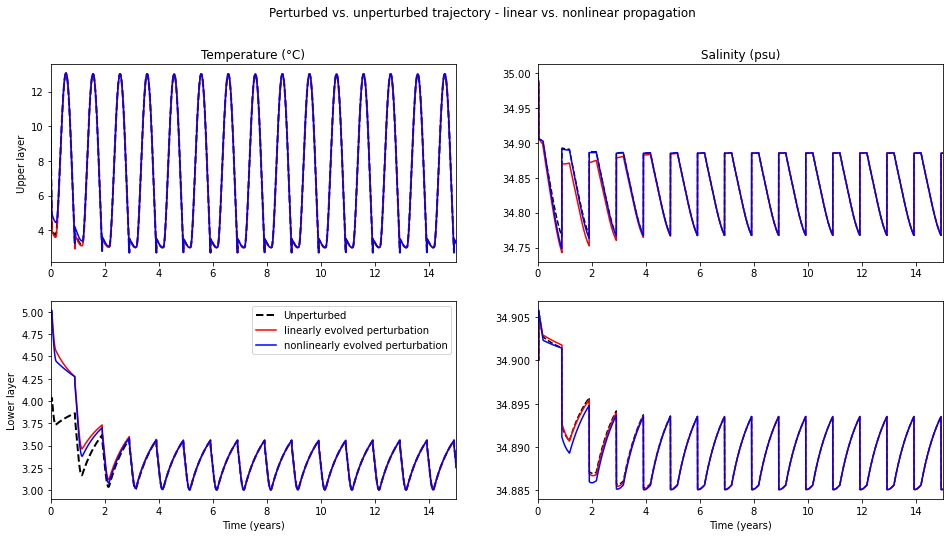

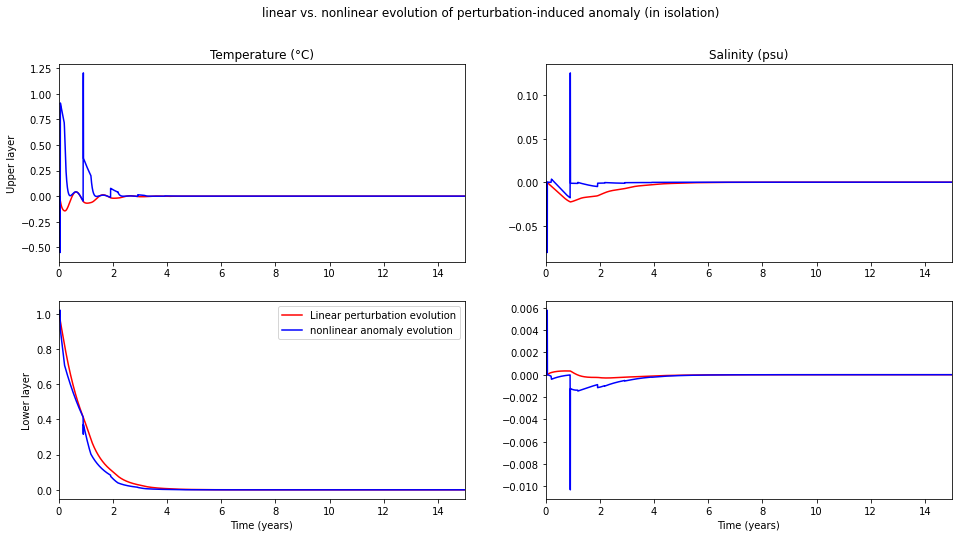

In [7]:
#-------------------------------------------------------------------------------
fig1,ax1=plt.subplots(2,2)
tyrs=t/31536000.
# Plot original unperturbed mean state
ax1[0,0].plot(tyrs,T1_up,'k',linewidth=2,linestyle='--')
ax1[0,1].plot(tyrs,S1_up,'k',linestyle='--')
ax1[1,0].plot(tyrs,T3_up,'k',linewidth=2,linestyle='--')
ax1[1,1].plot(tyrs,S3_up,'k',linestyle='--')
# Plot linearly perturbed mean state
ax1[0,0].plot(tyrs,T1_lp,'r')
ax1[0,1].plot(tyrs,S1_lp,'r')
ax1[1,0].plot(tyrs,T3_lp,'r')
ax1[1,1].plot(tyrs,S3_lp,'r')
# Plot nonlinearly perturbed state
ax1[0,0].plot(tyrs,T1_np,'b')
ax1[0,1].plot(tyrs,S1_np,'b')
ax1[1,0].plot(tyrs,T3_np,'b')
ax1[1,1].plot(tyrs,S3_np,'b')

ax1[0,0].set_title('Temperature (°C)')
ax1[0,1].set_title('Salinity (psu)')
ax1[0,0].set_ylabel('Upper layer')
ax1[1,0].set_ylabel('Lower layer')
ax1[1,1].set_xlabel('Time (years)')
ax1[1,0].set_xlabel('Time (years)')

for A in ax1: 
    for AX in A:
        AX.set_xlim(tyrs[0],tyrs[-1])
ax1[1,0].legend(['Unperturbed','linearly evolved perturbation',\
                 'nonlinearly evolved perturbation'])
fig1.set_size_inches(16,8)
fig1.suptitle(\
    'Perturbed vs. unperturbed trajectory - linear vs. nonlinear propagation');

fig2,ax2=plt.subplots(2,2)
tyrs=t/31536000.
# Plot linear perturbation evolution in isolation
ax2[0,0].plot(tyrs,T1_tl,'r')
ax2[0,1].plot(tyrs,S1_tl,'r')
ax2[1,0].plot(tyrs,T3_tl,'r')
ax2[1,1].plot(tyrs,S3_tl,'r')
# Plot nonlinear anomaly evolution (perturbed NL - unperturbed NL)
ax2[0,0].plot(tyrs,T1_np-T1_up,'b')
ax2[0,1].plot(tyrs,S1_np-S1_up,'b')
ax2[1,0].plot(tyrs,T3_np-T3_up,'b')
ax2[1,1].plot(tyrs,S3_np-S3_up,'b')

ax2[0,0].set_title('Temperature (°C)')
ax2[0,1].set_title('Salinity (psu)')
ax2[0,0].set_ylabel('Upper layer')
ax2[1,0].set_ylabel('Lower layer')
ax2[1,1].set_xlabel('Time (years)')
ax2[1,0].set_xlabel('Time (years)')

for A in ax2: 
    for AX in A:
        AX.set_xlim(tyrs[0],tyrs[-1])

ax2[1,0].legend(['Linear perturbation evolution','nonlinear anomaly evolution'])
fig2.set_size_inches(16,8)
fig2.suptitle(\
'linear vs. nonlinear evolution of perturbation-induced anomaly (in isolation)');

When we look at the perturbation evolution in isolation (lower figure), we can see clearly where the linear model misses an anomalous convection event. However, when we compare in the context of the full perturbed state (upper figure), the error doesn't seem so drastic, particularly in the lower layer, where it was applied.

But what was the point? We had to resort to a numerical solution, just as we did with the nonlinear model, only to get an erroneous response. Why not just perturb the nonlinear model? This is a fair question in the context of the tangent-linear model, where, much like the nonlinear model, we can only examine the sensitivity to perturbations by applying lots of them, one at a time, in an ensemble of different runs, then piecing together a picture of the general response. However, with a couple more steps of linear algebra, the tangent-linear model transforms (or, rather, transposes) into the _adjoint_ of the nonlinear model, which makes the ensemble approach completely redundant by simultaneously describing the linear response to every possible perturbation at the same time, with just a single execution.

# The adjoint model

When we ask about the "response" of the system to a perturbation, we usually don't care about the system as a whole, but a specific quantity that we are interested in. We don't care about how the ocean _as a whole_ responds to a deep temperature perturbation in the subpolar gyre (such as the one in the above example), we care about how heat content, or sea surface salinity, or volume transport responds. These quantities of interest (QOIs) are functions of the state vector, $J(|\bv{U}\rangle)$. For simplicity, we will assume that this is a scalar-valued, linear function (as is the case for all of the above examples). 

In the tangent-linear model we would evolve a perturbation $|\bv{u}(t_{0})\rangle$ to the state vector to give its state at a later time $|\bv{u}(t_{1})\rangle=\BM{\Psi}(t_{1},t_{0})|\bv{u}(t_{0})\rangle$, and then measure the anomalous impact on the QOI, $J(|\bv{u}(t_{1})\rangle)$. As we have taken the $J$ to be scalar-valued and linear, this is more clearly represented as the inner product 

<center><font size=4>$J(|\bv{u}(t_{1})\rangle)=\langle\bv{F}|\bv{u}(t_{1})\rangle=\langle\bv{F}|\BM{\Psi}(t_{1},t_{0})|\bv{u}(t_{0})\rangle.$</center></font>

Before continuing, it is perhaps worth developing some intuition with an example from our model. Consider that we are interested in the total heat content of the gyre interior, which is given by the equation

<center><font size=4>$(T_{1}h+T_{3}d)\pi r^{2}c_{p}\rho_{0}$ </center></font>

where $c_{p}=3850$ JK$^{-1}$kg$^{-1}$ is the specific heat capacity of seawater and the other values are defined as before. The corresponding QOI function $J(|\bv{u}\rangle) = \langle\bv{F}|\bv{u}\rangle$, with $\langle\bv{F}|=\begin{pmatrix} \pi r^{2}c_{p}\rho_{0}h & 0 & \pi r^{2}c_{p}\rho_{0}d & 0\end{pmatrix}$. 

Consider the units of this vector - while a state anomaly vector has units of $\begin{pmatrix}\mathrm{K} & \mathrm{psu} & \mathrm{K} & \mathrm{psu} \end{pmatrix}^{\dagger}$, this vector dot-multiplies with the state anomaly vector to produce units of anomalous heat content (J). Its units are therefore $\begin{pmatrix}\mathrm{JK}^{-1} & \mathrm{Jpsu}^{-1} & \mathrm{JK}^{-1} & \mathrm{Jpsu}^{-1} \end{pmatrix}$.

As we have considered, we can apply the row vector $\langle\bv{F}|\BM{\Psi}(t_{1},t_{0})$ to many perturbations $|\bv{u}(t_{0}\rangle$ and build up a picture of the scalar response. However, note that, as the transpose of a scalar is trivially the same scalar, we have, following the rules of the transpose applied to a product,

<center><font size=4>$
\langle\bv{F}|\BM{\Psi}(t_{1},t_{0})|\bv{u}(t_{0})\rangle 
= 
\langle\bv{F}|\BM{\Psi}(t_{1},t_{0})|\bv{u}(t_{0})\rangle^{\dagger}
=
\langle\bv{u}(t_{0})|\BM{\Psi}^{\dagger}(t_{0},t_{1})|\bv{F}\rangle.
$
</center></font>

What does this mean? Remember that the matrix multiplication $\BM{\Psi}(t_{1},t_{0})|\bv{u}(t_{0})\rangle$ corresponds to running the tangent-linear model to evolve a single perturbation. After this, we apply our QOI function of choice $\langle\bv{F}|$ to determine its impact. This is the left hand side. The right hand side consists of a matrix multiplication $\BM{\Psi}^{\dagger}(t_{0},t_{1})|\bv{F}\rangle$, which would therefore seem to involve running the transpose of the tangent-linear model to "evolve" a single QOI function, after which we would apply a perturbation of choice $\langle\bv{u}(t_{0})|$ to determine its impact. How do we make sense of this? From a linear algebra perspective, these two sides, while equal, are mirror images of each other. For this symmetry to make sense (evaluating the QOI function as a first step and applying an initial perturbation as a final step), the rightmost expression suggests that the transposed propagator is no longer sending vectors forward, but backward in time, from the point of QOI evaluation to the point of perturbation. 

What does it mean to "evolve" a QOI function back in time? Does it change as it goes back? Consider again our heat content example, with $\langle\bv{F}|=\begin{pmatrix} \pi r^{2}c_{p}\rho_{0}h & 0 & \pi r^{2}c_{p}\rho_{0}d & 0\end{pmatrix}$. Note that the entries corresponding to salinity are 0. This makes sense: we don't care about salinity at the point where we measure heat content. However, while salinity anomalies make no difference to heat content at the point in time when we measure it, we would expect that changing salinity at some earlier point in time would change our heat content at the point when we measure it. This is how the QOI function vector evolves backward in time: even one time step earlier, we would be able to impact the next time step's heat content by changing salinity, and therefore the boundary current and boundary-interior eddy exchange. The transposed propagator - the adjoint - sends the function vector backwards through the model to determine the impacts of these earlier changes, and returns a _sensitivity_ vector which describes them. Onto this vector we can project any perturbation to obtain its response.

At this point, it is probably best to present the adjoint model and some examples with it.

In [8]:
# ADJOINT MODEL
#-------------------------------------------------------------------------------
def BS14_AD(TRAJ,QOI=[0,0,0,0],dt=86400):
    '''
    Run the Born and Stocker (2014) model of the North Atlantic subpolar gyre in 
    adjoint mode.
    
    Parameters:
    -----------
    TRAJ (list)             : The solution [T1,S1,T3,S3] obtained by running the 
                              nonlinear model BS14_NL about which the sensitivity
                              to perturbations is desired
    QOI (1x4 ndarray)       : The vector function describing the Quantity Of Interest
    dt (float)              : The size of the time step (in seconds). 
                              Defaults to BS14 value.
    
    Returns:
    -----------
    T1_ad,S1_ad,T3_ad,S3_ad (1xnt ndarrays): Time series of the adjoint-evolved 
                                      sensitivities of the QOI to perturbations 
                                      in each of the state vector variables.
    '''    
    
    # Initialise sensitivity variables
    T1_ad,S1_ad,T3_ad,S3_ad=np.zeros(nt),np.zeros(nt),np.zeros(nt),np.zeros(nt)

    # Sensitivity variable at time of evaluation is just QOI function:
    T1_ad[-1]=QOI[0]
    S1_ad[-1]=QOI[1]
    T3_ad[-1]=QOI[2]
    S3_ad[-1]=QOI[3]

    # Extract individual trajectory variables from "TRAJ"
    T1,S1,T3,S3=TRAJ[0],TRAJ[1],TRAJ[2],TRAJ[3]

    ######################################################################
    # Define the constant velocity partial derivative terms used in the Jacobian A(t)
    dU1dT1=-alpha*( (g*h)/(2*f*w*rho0) )
    dU1dS1= beta *( (g*h)/(2*f*w*rho0) )
    dU1dT3=-alpha*( (g*d)/(2*f*w*rho0) )
    dU1dS3= beta *( (g*d)/(2*f*w*rho0) )

    dU2dT1=0
    dU2dS1=0
    dU2dT3=-alpha*( (g*d)/(2*f*w*rho0) )
    dU2dS3= beta *( (g*d)/(2*f*w*rho0) )

    # Loop backwards over time to evolve the sensitivity of the QOI
    for ti in np.arange(nt-1,0,-1):
        # Define the Jacobian A(t) as a numpy array
        A=np.array([\
                    [c1*dU1dT1*(T2-T1[ti-1])-(c1*U1[ti-1])-(1/tau) , \
                     c1*dU1dS1*(T2-T1[ti-1]),\
                     c1*dU1dT3*(T2-T1[ti-1]),\
                     c1*dU1dS3*(T2-T1[ti-1])\
                    ],[\
                     c1*dU1dT1*(S2-S1[ti-1]),\
                     c1*dU1dS1*(S2-S1[ti-1])-(c1*U1[ti-1]),\
                     c1*dU1dT3*(S2-S1[ti-1]),\
                     c1*dU1dS3*(S2-S1[ti-1])\
                    ],[\
                     c2*dU2dT1*(T4-T3[ti-1]),\
                     c2*dU2dS1*(T4-T3[ti-1]),\
                     c2*dU2dT3*(T4-T3[ti-1])-(c2*U2[ti-1]),\
                     c2*dU2dS3*(T4-T3[ti-1])\
                    ],[\
                     c2*dU2dT1*(S4-S3[ti-1]),\
                     c2*dU2dS1*(S4-S3[ti-1]),\
                     c2*dU2dT3*(S4-S3[ti-1]),\
                     c2*dU2dS3*(S4-S3[ti-1])-(c2*U2[ti-1])\
                    ]])
        # Calculate the approximate propagator t_i-1 -> ti 
        # and transpose it for the adjoint ti -> t_i-1
        
        M=np.eye(4)+(A*dt)
        M_T=M.T 
    
        # Matrix multiply the approximate adjoint propagator (I+A(t)Δt)* 
        # by the cost function to advance it backward
        u_ad_after =np.array([T1_ad[ti],S1_ad[ti],T3_ad[ti],S3_ad[ti]])
        u_ad_before=np.dot(M_T,u_ad_after)
    
        # Extract the individual sensitivity variables from the sensitivity vector
        T1_ad[ti-1]=u_ad_before[0]
        S1_ad[ti-1]=u_ad_before[1]
        T3_ad[ti-1]=u_ad_before[2]
        S3_ad[ti-1]=u_ad_before[3]
        
    return T1_ad,S1_ad,T3_ad,S3_ad
    

Before returning to heat content, consider an even simpler example: the QOI of upper layer temperature (as the upper layer is quite thin, this could be considered the sea surface temperature [SST] of the model). We use the same trajectory solution as we did for our tangent-linear perturbation experiments, but retain in mind that the tangent linear of the trajectory returned a time series of the approximate response to perturbations applied the fixed time $t=0$ years. The adjoint, conversely, "begins" with the QOI measured at the fixed time $t=15$ years, and returns a time series of the sensitivity of this measurement to earlier changes. To see what this looks like, we run the adjoint model with the "SST" QOI $\langle\bv{F}|=\begin{pmatrix} 1 & 0 & 0 & 0 \end{pmatrix}$ and plot the results:

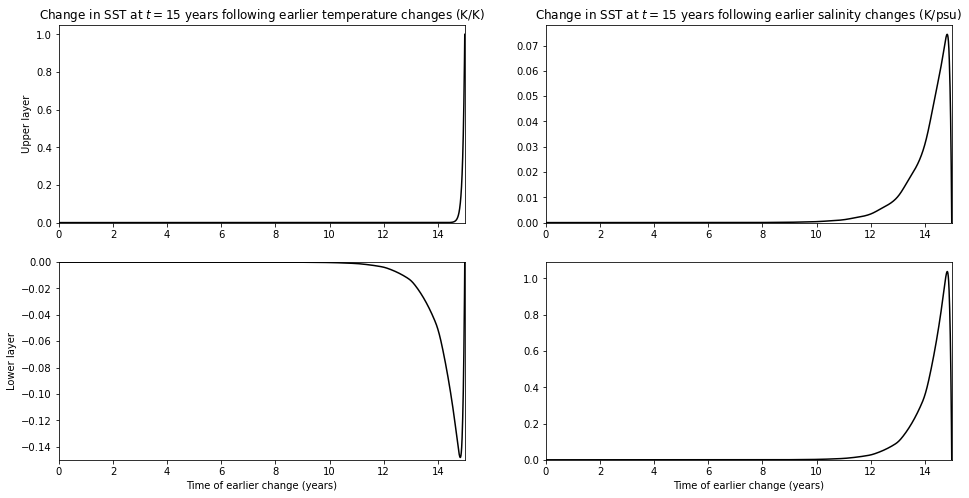

In [9]:
#-------------------------------------------------------------------------------
T1_ad,S1_ad,T3_ad,S3_ad=BS14_AD(TRAJ_up,QOI=[1,0,0,0])

fig,ax=plt.subplots(2,2)
tyrs=t/31536000.

ax[0,0].plot(tyrs,T1_ad,'k');ax[0,0].set_ylim(0,)
ax[0,1].plot(tyrs,S1_ad,'k');ax[0,1].set_ylim(0,)
ax[1,0].plot(tyrs,T3_ad,'k');ax[1,0].set_ylim(-.15,0)
ax[1,1].plot(tyrs,S3_ad,'k');ax[1,1].set_ylim(0,)

ax[0,0].set_title(\
    'Change in SST at $t=15$ years following earlier temperature changes (K/K)')
ax[0,1].set_title(\
    'Change in SST at $t=15$ years following earlier salinity changes (K/psu)')
ax[0,0].set_ylabel('Upper layer')
ax[1,0].set_ylabel('Lower layer')
ax[1,1].set_xlabel('Time of earlier change (years)')
ax[1,0].set_xlabel('Time of earlier change (years)')
for A in ax: 
    for AX in A:
        AX.set_xlim(tyrs[0],tyrs[-1])
fig.set_size_inches(16,8)

Some key features of this figure are:
- The sensitivity of upper layer temperature measured at $t=15$ years to changes in all variables at $t=0$ years is effectively 0: it is not possible to induce a meaningful change in SST by perturbing the model 15 years in advance.
- Unsurprisingly, the change in SST at $t=15$ years "following" a 1K perturbation in upper layer temperature at $t=15$ years is ... 1K (as indicated by the spike at $t=15$ years in the top left panel).
- The sensitivity to lower layer temperature perturbation is negative:  warming the deep ocean leads to cooling in the surface ocean in the model, and vice versa.
- There is a lag of about 2 months between the between the deep ocean and the upper ocean: the most effective time to perturb the lower layer (so as to impact SST at $t=15$ years) is at $t=14.8$ years, when a warming perturbation of 1 K in the lower layer leads to an SST change of $-0.15$ K (the minimum in the lower left panel)
- Earlier salinity changes are more persistent than earlier temperature changes, especially in the top layer. A unit perturbation to upper layer temperature at $t=14$ years has near-zero effect on SST at $t=15$ years (top left panel), but a unit perturation to upper layer salinity at $t=14$ years induces a response of $0.03$K in SST at $t=15 years$ (top right panel). This is due to the mixed surface boundary conditions: surface temperature anomalies rapidly decay, but surface salinity anomalies cannot be fluxed out to the atmosphere.

We now return to our heat content QOI: $\langle\bv{F}|=\begin{pmatrix} \pi r^{2}c_{p}\rho_{0}h & 0 & \pi r^{2}c_{p}\rho_{0}d & 0\end{pmatrix}$. We run the adjoint as above, but with this different QOI, and compare:

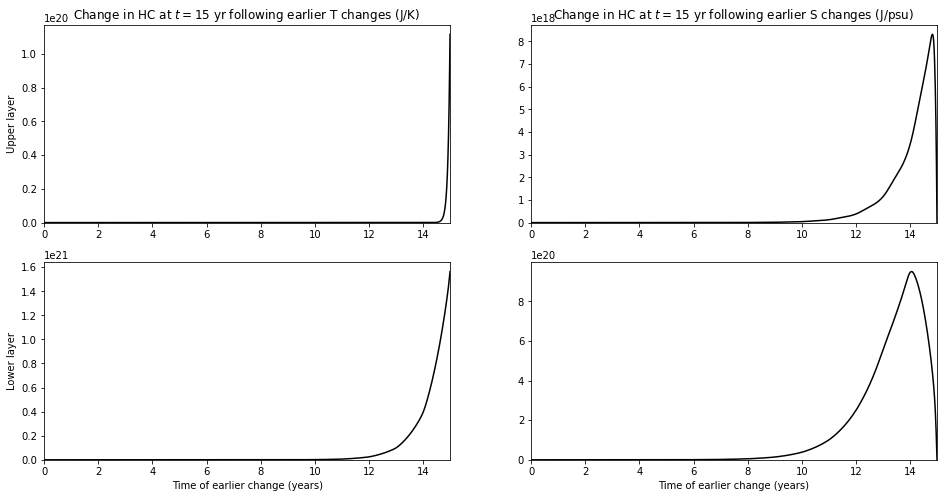

In [10]:
#-------------------------------------------------------------------------------
cp=3850
T1_ad,S1_ad,T3_ad,S3_ad=BS14_AD(TRAJ_up,\
                        QOI=[np.pi*(r**2)*cp*rho0*h,0,np.pi*(r**2)*cp*rho0*d,0])

fig,ax=plt.subplots(2,2)
tyrs=t/31536000.

ax[0,0].plot(tyrs,T1_ad,'k');ax[0,0].set_ylim(0,)
ax[0,1].plot(tyrs,S1_ad,'k');ax[0,1].set_ylim(0,)
ax[1,0].plot(tyrs,T3_ad,'k');ax[1,0].set_ylim(0,)
ax[1,1].plot(tyrs,S3_ad,'k');ax[1,1].set_ylim(0,)

ax[0,0].set_title(\
            'Change in HC at $t=15$ yr following earlier T changes (J/K)')
ax[0,1].set_title(\
            'Change in HC at $t=15$ yr following earlier S changes (J/psu)')
ax[0,0].set_ylabel('Upper layer')
ax[1,0].set_ylabel('Lower layer')
ax[1,1].set_xlabel('Time of earlier change (years)')
ax[1,0].set_xlabel('Time of earlier change (years)')
for A in ax: 
    for AX in A:
        AX.set_xlim(tyrs[0],tyrs[-1])
fig.set_size_inches(16,8)

We now see a spike in both the upper and lower layer temperatures at $t=15$ years. As they both contribute directly to the measurement, the most effective time to perturb them is at the time the measurement is made. As before, the decay of surface temperature anomalies means that perturbations to upper layer temperatures drastically reduce in effectiveness if applied any earlier. 

Interestingly, there is now a lag of nearly a whole year between deep salinity changes and full-depth heat content response, with a unit change in salinity stimulating nearly 1 ZJ in heat content. Note that a 1 psu change in salinity is far outside the realms of a "small" perturbation, but recall that, as this is a linear model, it is blind to "realistic" values and scales its response without bound. The model simply provides a map between input and output, it is up to us to determine whether this input and output make sense. A more realistic 0.1psu change in salinity would accordingly correspond to a ~0.1 ZJ change in heat content.

<hr style="height:2pt">